# Natural Language Processing 101 Workshop
## Demo 1- Text Pre-Processing

In this demo, we'll be walking through how to perform the fundamentals of text 
pre-processing within R. Let's briefly go over the core packages that I've pre-downloaded 
into our session:
* **readr** facilitates the easy uploading of external data files such as CSVs
* **dplyr** promotes streamlined data frame creation and manipulation
* **stringr** is all about working with text character strings
* **tidytext** provides more specialized functions to prepare text data for various NLP use cases
* **SnowballC** offers access to the popular Porter stemmer for word stemming- we'll cover this topic shortly!

These libraries are all great resources for performing essential text pre-processing
functions. I'll also load in our working data set of 10,000 comments scraped from
r/nyc.

In [1]:
library(readr)
library(dplyr)
library(stringr)
library(tidytext)
library(SnowballC)

nyc <- read_csv("r_nyc_10k.csv")

ERROR: Error in library(readr): there is no package called ‘readr’


---
## 1.) Character Encoding

Text is read into programs through designated **character encodings**.
- The most common encoding types are *Unicode/UTF-8* and *ASCII*.
- Without the right encoding schema, your NLP methods will likely raise an error.


Let's check the character encoding of our r/nyc text data. The "body" column of the
loaded data frame features the text of the scraped r/nyc comments. 

In [ ]:
_____(nyc$body)

Our 1 confidence score on the UTF-8 encoding for the text column of our data frame 
assures us that the following pre-processing methods should work without 
problems around character encoding. Let’s now inspect our data set in more detail.

In [ ]:
head(nyc) 

This provides us with the first 10 records of our data set. “id” is the unique 
identifier for each comment, “author” lists the Reddit username who wrote the 
comment, “body” features the comments themselves, “score” refers to the 
Reddit system of being able to “upvote” or “downvote” comments similar to a 
like/dislike framework, and “date” as the year, month, and day the comment was posted. 

--- 
## 2.) String Manipulation

Text is stored as the *string* data type within programs, which led to the creation of string manipulation packages such as *stringr* that clean & prepare documents before conducting NLP analyses. Let's create a series of test strings to visualize the outcomes of some of the most popular *stringr* methods. 

In [ ]:
noisy_string <- "The East Village- between its restaurants &amp cafes- has the best food in the city."
concatenation_string <- "I think it is my favorite neighborhood in all of New York."
capital_string <- "You think I just like pizza? No, I LOVE PIZZA!"

### 2A.) Deletion & Replacement

Raw text data often includes unwanted characters that you'd like to either **delete** or **replace** before moving forward with an NLP analysis. A common example of this is leftover characters from HTML tags from text data sourced from websites. The *noisy_string* example includes '`&amp`', which refers to how the "&" symbol is represented within HTML. Let's therefore use a stringr function to remove '`&amp`' from the text and replace it with "and". 

In [ ]:
noisy_string <- _____(noisy_string, "&amp", "and")
noisy_string

This successfully deletes “`&amp`” from the string. There's a 
wide range of additional types of noise a researcher may want to remove from text. 
While our last str_replace command is quite effective at removing exact matches
with '`&amp`', *regular expressions (regexes)* are an additional tool that allows for greater flexibility to match a variety of character types. Regexes are used to match variable patterns within text such as email addresses or phone numbers.   

One common use case for regexes within text pre-processing is to remove all types 
of punctuation, since many NLP methods would otherwise consider tokenized punctuation
to be their own unique words. Luckily, there is a regex that specialize
in matching with all punctuation. Let's use this to remove the punctuation found within *noisy_string*: 

In [ ]:
_____(noisy_string, '_____')
noisy_string

### 2B.) Concatenation 

**Concatenation** refers to the combination of either seperate words or strings. Let's say that *noisy_string* and *concatenation_string* are actually from the same paragraph and we'd like to recombine these sentences into one document. We're able to acheive this as follows:

In [ ]:
_____(noisy_string, concatenation_string)

You may also want to combine n-grams into single word units within your text, such as concatenating all instances of the bi-gram “New York” into the single token of “New_York.” Let's learn a stringr function to 
accomplish this goal within *concetenation_string*: 

In [ ]:
_____(concatenation_string, "New York", "_____")

### 2C.) Lowercasing
It’s common within text pre-processing to convert all words to **lowercase**. Capitalization may lead an NLP method to consider the same words as separate entities based on casing alone, such as "pizza" and "PIZZA" in the *capital_string* example. We can solve this as follows:

In [ ]:
_____(capital_string)

---
## 3.) Tokenization 

**Tokenization** refers to the segmentation of text components into units such as 
individual words, sentences, paragraphs, characters, or n-grams. Let's use
the tidytext package to create a new data frame of our r/nyc comments split
into word tokens. 

In [ ]:
tokens <- nyc %>%
    _____("_____", body)

head(tokens)

Our 10k original comments are now seperated into unique rows of individual word 
tokens. By default, unnest_tokens lowercases the tokens and removes punctuation 
from the original string, which would allow you to skip our previous regex string
removal workflow.

---
## 4.) Stopword Removal

**Stopword removal** refers to the process of deleting common words from text documents. 
- Common examples include "and", "the", and "but".
- These words are often considered to be irrelevant to core NLP research interests. 
- Can also be domain-specific, such as deleting instances of "NYC" within the r/nyc subreddit.

*Tidytext* comes with a 
pre-made common stopwords list that we can call and apply directly to our generated
tokens data frame. 

In [ ]:
data(_____)
    
tokens <- tokens %>%
    _____(stop_words) 

head(tokens)

You'll notice how words such as "the", "has", and "been" that were previously found within the token data frame are removed after performing the stopword anti-join.

---
## 5.) Stemming

**Stemming** is used to manipulate text into its root word form.
- "swimmers", "swimming", and "swims" would all be stemmed to "swim". 
- The idea behind this is all words can be represented by the same base concept.
- Often used to reduce total vocabulary size & preserve computational memory. 


There are a variety of different stemming algorithms available with the most commonly used being the Porter stemmer. We can use the methods from the *SnowballC* package to stem our own tokenized r/nyc comments 
as follows. 

In [ ]:
stems <- tokens %>%
  mutate(stem = _____(_____))

head(stems)

Words such as "shifting" and "gradually" are now stemmed to their roots of "shift" and "gradual" respectively. Note that stemming frameworks often cut words to their roots in ways that are not intuitive to non-linguisticians, such as the Porter root stem of "coupl" for "couple". 

---
## 6.) Parts-of-Speech (POS) Tags
**POS tags** identifies the grammatic and lexical classes that words in your text data belong to. The following image captures a selection of these tags- you can think of nouns, verbs, conjugates, and the like. 

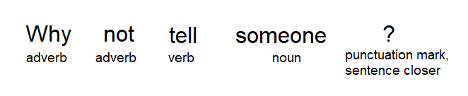

There's a variety of packages 
that follow different POS tag rules, with *udpipe* - referring to the Universal
Dependencies tagging schema- being a popular library choice for R. We won't run this code chunk within the demo itself since it takes a while to process, but feel free to experiment with POS tags on your own time 
following the workflow delineated below. 

In [ ]:
library("udpipe")

## Donwload & load the POS tags for English
model <- udpipe_download_model(language = "english")
model <- udpipe_load_model(model)

## Annotation will take quite some time, particularly if you're using the 
## non-stopword version of our tokenized dataset 
tags <- udpipe_annotate(model, x = tokens$word)

## The generated "upos" column in the following dataframe will have each token's 
## identified POS tags.
pos <- as.data.frame(tags)

You've now completed the pre-processing demo and established a working knowledge
of how to perform the fundamentals of text data pre-processing in R. Great job!